# <font color = yellow> Expanded Kenya: all dataset features

In [1]:
# List all installed R libraries
installed_libraries <- installed.packages()

# Print the names of the installed libraries
t(installed_libraries[, "Package"])


abind,archive,askpass,assertthat,automl,backports,base64enc,BBmisc,BH,bit,⋯,rpart,spatial,splines,stats,stats4,survival,tcltk,tools,translations,utils
abind,archive,askpass,assertthat,automl,backports,base64enc,BBmisc,BH,bit,⋯,rpart,spatial,splines,stats,stats4,survival,tcltk,tools,translations,utils


In [2]:
# Load necessary libraries

library(readr)
library(dplyr)
library(kaggler)
library(reticulate)
library(ggplot2)
library(gridExtra)


# library(rle)   # Run Length Encoding: base rle( ) fct

options(scipen = 999)
#     Load the datasets w/ powershell:

#  kaggle competitions download -c playground-series-s5e1 -p 'C:/all_kaggle/jan25/dataset'
# $basePath = "C:\all_kaggle\jan25\dataset"
# $zipFilePath = Join-Path $basePath "playground-series-s5e1.zip"
# $trainFolderPath = Join-Path $basePath "train"
# $testFolderPath = Join-Path $basePath "test"
# $submissionFolderPath = Join-Path $basePath "submission"
#     # Unzip the file
# Expand-Archive -Path $zipFilePath -DestinationPath $basePath
#     # Move the CSV files to their respective subfolders
# Move-Item -Path (Join-Path $basePath "train.csv") -Destination $trainFolderPath
# Move-Item -Path (Join-Path $basePath "test.csv") -Destination $testFolderPath


Warning message:
"package 'readr' was built under R version 4.3.3"
Warning message:
"package 'dplyr' was built under R version 4.3.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'reticulate' was built under R version 4.3.3"
Warning message:
"package 'ggplot2' was built under R version 4.3.3"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




### <font color = yellow> Get the kaggle, training dataset

In [3]:
vignette("dplyr")
vignette("dplyr")

starting httpd help server ...
 done



In [4]:
# Load the datasets with the correct path
train <- read_csv('C:/all_kaggle/jan25/dataset/train/train.csv', show_col_types = FALSE)
# test <- read_csv('C:/all_kaggle/jan25/dataset/test/test.csv', show_col_types = FALSE)
dim(train)
head(train,2)
# dim(test)

[1] 230130      6

id,date,country,store,product,num_sold
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NA
1,2010-01-01,Canada,Discount Stickers,Kaggle,973


# <font color = lime> Functions Section:

### <font color = yellow> Fct: Preliminary dfs: year_2010, 2011, 2012, etc...

In [5]:
# Filter the data for the specified year within the function
get_filtered_year <- function(df, year) {
  filtered_data <- df %>% filter(year == !!year)
  return(filtered_data)
}

# Initialize the vector of years
yr <- c(2010, 2011, 2012, 2013, 2014, 2015, 2016)

# Loop through each year and create separate dataframes
for (i in 1:length(yr)) {
  filtered_data <- get_filtered_year(train, yr[i])
  var_name <- paste0("year_", yr[i])
  assign(var_name, filtered_data)
}

# Display the content of the dynamically created dataframes
dim(year_2010)
dim(year_2011)


[1] 230130      6

[1] 230130      6

### <font color = lime> Grouping / Plotting Monthly Sales:

In [6]:
# Assuming your dataframe is named year_2010
# Group by month and calculate total sales for each month
monthly_group_by <- function(df) {
    
    monthly_sales <- df %>%
      group_by(mo) %>%
      summarise(total_sales = sum(num_sold, na.rm = TRUE))
    
    # Display the prepared data
    # print(monthly_sales)
    return(monthly_sales)    
}  

In [7]:
    # Create the histogram plot
histogram_monthly_plot <- function(df) {

    plot <- ggplot(monthly_sales, aes(x = mo, y = total_sales, fill = mo)) +
      geom_bar(stat = "identity") +
      labs(title = "Total Sales by Month for the Year 2010",
           x = "Month",
           y = "Total Sales") +
      theme_minimal() +
      scale_fill_brewer(palette = "Paired")

    # Print the plot 
    print(plot)
    }
      

In [8]:
library(dplyr)

country_sales_and_na_mo <- function(df, country_name) {
    
    # Filter the dataframe for the specified country and non-NA num_sold values
    filtered_country_na <- df %>%
      filter(country == !!country_name)
    
    # Display the filtered data (optional)
    print(head(filtered_country_na, 1))
    
    # Summarize the count of NA values per month
    count_na_per_month <- function(df) {
      df %>%
        group_by(mo) %>%
        summarise(count_na = sum(is.na(num_sold)))
    }
    
    # Apply the function to the entire dataframe to get NA counts
    test_sum_na <- count_na_per_month(df)
    
    # Summarize total sales per month for the filtered country
    total_sales_per_month <- function(df) {
      df %>%
        group_by(mo) %>%
        summarise(total_sales = sum(num_sold, na.rm = TRUE))
    }
    
    # Apply the function to the filtered data
    test_mo_na <- total_sales_per_month(filtered_country_na)
    
    # Perform a full join to combine count of NAs and total sales per month
    final_df <- full_join(test_sum_na, test_mo_na, by = "mo")
    
    # Return the final dataframe
    return(final_df)
}



In [9]:
# head(country_sales_and_na_mo(year_2010, "Kenya"), 2)

In [10]:


product_sales_and_na_mo <- function(df, product_name) {
    
    # Filter the dataframe for the specified product and non-NA num_sold values
    filtered_product_na <- df %>%
      filter(product == !!product_name & !is.na(num_sold))
    
    # Display the filtered data (optional)
    print(head(filtered_product_na, 1))
    
    # Summarize the count of NA values per month
    count_na_per_month <- function(df) {
      df %>%
        group_by(mo) %>%
        summarise(count_na = sum(is.na(num_sold)))
    }
    
    # Apply the function to the entire dataframe to get NA counts
    test_sum_na <- count_na_per_month(df)
    
    # Summarize total sales per month for the filtered product
    total_sales_per_month <- function(df) {
      df %>%
        group_by(mo) %>%
        summarise(total_sales = sum(num_sold, na.rm = TRUE))
    }
    
    # Apply the function to the filtered data  (GS: missed this part) 
    test_mo_na <- total_sales_per_month(filtered_product_na)
    
    # Perform a full join to combine count of NAs and total sales per month
    final_df <- full_join(test_sum_na, test_mo_na, by = "mo")
    
    # Return the final dataframe
    return(final_df)
}

In [11]:
# head(product_sales_and_na_mo(year_2010, "Holographic Goose"), 3)

### <font color = lime> The Pattern:  Each Country(1:6) > Each store(1:3) > Each product (1:5) = 90 row cycles

#### 1-1-5/ 1-1-5 / 1-1-5 (1 country/ each store / each product  { for each day => 90 rows }

### <font color = yellow> Cursory Evaluations for NAs - only found.: num_sold ... cat response feature

In [12]:
glimpse(train)
summary(train)

Rows: 230,130
Columns: 6
$ id       <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ date     <date> 2010-01-01, 2010-01-01, 2010-01-01, 2010-01-01, 2010-01-01, …
$ country  <chr> "Canada", "Canada", "Canada", "Canada", "Canada", "Canada", "…
$ store    <chr> "Discount Stickers", "Discount Stickers", "Discount Stickers"…
$ product  <chr> "Holographic Goose", "Kaggle", "Kaggle Tiers", "Kerneler", "K…
$ num_sold <dbl> NA, 973, 906, 423, 491, 300, 1837, 1659, 807, 940, 375, 2212,…


       id              date              country             store          
 Min.   :     0   Min.   :2010-01-01   Length:230130      Length:230130     
 1st Qu.: 57532   1st Qu.:2011-10-02   Class :character   Class :character  
 Median :115065   Median :2013-07-02   Mode  :character   Mode  :character  
 Mean   :115065   Mean   :2013-07-02                                        
 3rd Qu.:172597   3rd Qu.:2015-04-02                                        
 Max.   :230129   Max.   :2016-12-31                                        
                                                                            
   product             num_sold     
 Length:230130      Min.   :   5.0  
 Class :character   1st Qu.: 219.0  
 Mode  :character   Median : 605.0  
                    Mean   : 752.5  
                    3rd Qu.:1114.0  
                    Max.   :5939.0  
                    NA's   :8871    

### <font color = yellow> Expand the date to (year, month, day)

In [13]:
head(train,1)

id,date,country,store,product,num_sold
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NA


In [14]:
library(lubridate)
# vignette("lubridate")
# vignette("lubridate")

Warning message:
"package 'lubridate' was built under R version 4.3.3"

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




## <font color = yellow> Add: year, mo, day, wkday variables

In [15]:
train <- train %>% mutate(year = year(date), mo = month(date , label = TRUE), day = day(date), wkday = wday(date, label = TRUE ) )
tail(train, 2)

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242,2016,Dec,31,Sat
230129,2016-12-31,Singapore,Premium Sticker Mart,Kerneler Dark Mode,1622,2016,Dec,31,Sat


# <font color = yellow> Create date arrays: Month / Year

### <font color = yellow> month_list$mo 

In [16]:
# Generate a sequence of 12 months from January to December
months_array <- format(seq.Date(from = as.Date("2010-01-01"), to = as.Date("2010-12-01"), by = "month"), "%b")
#print(months_array)

# Generate an array to store the filtered data  (ALL Years)
month_list <- list()

# Loop through each month and filter the dataframe
for (month in months_array) {
  filtered_data <- train %>%
    filter(month(date, label = TRUE) == month & year(date) == 2010)
  month_list[[month]] <- filtered_data
}

tail(month_list$Jan)


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
2784,2010-01-31,Singapore,Stickers for Less,Kerneler Dark Mode,940,2010,Jan,31,Sun
2785,2010-01-31,Singapore,Premium Sticker Mart,Holographic Goose,305,2010,Jan,31,Sun
2786,2010-01-31,Singapore,Premium Sticker Mart,Kaggle,1700,2010,Jan,31,Sun
2787,2010-01-31,Singapore,Premium Sticker Mart,Kaggle Tiers,1537,2010,Jan,31,Sun
2788,2010-01-31,Singapore,Premium Sticker Mart,Kerneler,741,2010,Jan,31,Sun
2789,2010-01-31,Singapore,Premium Sticker Mart,Kerneler Dark Mode,1054,2010,Jan,31,Sun


### <font color = yellow> filtered_year_20xx 

In [17]:
# Create array w/range of years
years_array <- seq(2010, 2016, by = 1)

# Generate an array to store the filtered data
year_list <- list()

# Loop through each year and filter the dataframe
for (year in years_array) {
  filtered_data <- train %>%
    filter(year == !!year)  # Use the correct variable inside the filter
  year_list[[as.character(year)]] <- filtered_data
}

# Function to return filtered data for a specific year
get_filtered_year <- function(year) {
  year_list[[as.character(year)]]
}

# Example: Accessing the dataframe for the year 2011
filtered_year_2011 <- get_filtered_year(2011)
print(dim(filtered_year_2011))
print(tail(filtered_year_2011, 10))

# Example: Accessing the dataframe for the year 2012
filtered_year_2012 <- get_filtered_year(2012)
print(dim(filtered_year_2012))
print(head(filtered_year_2012, 10))


[1] 32850    10
# A tibble: 10 × 10
      id date       country   store     product num_sold  year mo      day wkday
   <dbl> <date>     <chr>     <chr>     <chr>      <dbl> <dbl> <ord> <int> <ord>
 1 65690 2011-12-31 Singapore Stickers… Hologr…      351  2011 Dec      31 Sat  
 2 65691 2011-12-31 Singapore Stickers… Kaggle      2017  2011 Dec      31 Sat  
 3 65692 2011-12-31 Singapore Stickers… Kaggle…     1870  2011 Dec      31 Sat  
 4 65693 2011-12-31 Singapore Stickers… Kernel…      977  2011 Dec      31 Sat  
 5 65694 2011-12-31 Singapore Stickers… Kernel…     1231  2011 Dec      31 Sat  
 6 65695 2011-12-31 Singapore Premium … Hologr…      384  2011 Dec      31 Sat  
 7 65696 2011-12-31 Singapore Premium … Kaggle      2668  2011 Dec      31 Sat  
 8 65697 2011-12-31 Singapore Premium … Kaggle…     2520  2011 Dec      31 Sat  
 9 65698 2011-12-31 Singapore Premium … Kernel…     1146  2011 Dec      31 Sat  
10 65699 2011-12-31 Singapore Premium … Kernel…     1497  2011 Dec      3

## <font color = yellow> Primary Cycle: 6 countries repeat in 90 row cycles

In [18]:
head(train[1:92,],2)
tail(train[1:92, ], 3)  # beginning of repeated cycle on Jan 2

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NA,2010,Jan,1,Fri
1,2010-01-01,Canada,Discount Stickers,Kaggle,973,2010,Jan,1,Fri


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
89,2010-01-01,Singapore,Premium Sticker Mart,Kerneler Dark Mode,1255,2010,Jan,1,Fri
90,2010-01-02,Canada,Discount Stickers,Holographic Goose,NA,2010,Jan,2,Sat
91,2010-01-02,Canada,Discount Stickers,Kaggle,881,2010,Jan,2,Sat


### <font color = yellow> Create reference dfs:

In [19]:
# Create the key data frames
country_df <- data.frame(
  Num = 1:6,
  Country = c("Canada", "Finland", "Italy", "Kenya", "Norway", "Singapore")
)

product_df <- data.frame(
  Num = 1:5,
  Product = c("Holographic Goose", "Kaggle", "Kaggle Tiers", "Kerneler", "Kerneler Dark Mode")
)

store_df <- data.frame(
  Num = 1:3,
  Store = c("Discount Stickers", "Stickers for Less", "Premium Sticker Mart"),
  kenya <- c(64, 46, 1358)   
)


In [20]:
names(train)

[1] "id"       "date"     "country"  "store"    "product"  "num_sold"
 [7] "year"     "mo"       "day"      "wkday"

### <font color = lime> Pattern 1: Country(6) x Product(5) x Store(3) = 90 rows ( = 1 day)

##### Pattern 1: Every 90 rows: Canada / Discount Stickers / Holographic Goose == NA

In [21]:
kenya_Jan_Holograph <- head(month_list$Jan %>% filter(year == "2010" & country == "Kenya" & product == "Holographic Goose"), 100)  # & is.na(num_sold)  )
kenya_Jan_Holograph

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
45,2010-01-01,Kenya,Discount Stickers,Holographic Goose,NA,2010,Jan,1,Fri
50,2010-01-01,Kenya,Stickers for Less,Holographic Goose,5,2010,Jan,1,Fri
55,2010-01-01,Kenya,Premium Sticker Mart,Holographic Goose,7,2010,Jan,1,Fri
135,2010-01-02,Kenya,Discount Stickers,Holographic Goose,NA,2010,Jan,2,Sat
140,2010-01-02,Kenya,Stickers for Less,Holographic Goose,5,2010,Jan,2,Sat
145,2010-01-02,Kenya,Premium Sticker Mart,Holographic Goose,6,2010,Jan,2,Sat
225,2010-01-03,Kenya,Discount Stickers,Holographic Goose,NA,2010,Jan,3,Sun
230,2010-01-03,Kenya,Stickers for Less,Holographic Goose,5,2010,Jan,3,Sun
235,2010-01-03,Kenya,Premium Sticker Mart,Holographic Goose,7,2010,Jan,3,Sun


## <font color = yellow> Total NAs: initial

In [22]:
# est initial na count
tally_na <- sum(is.na(train))
sum(is.na(train))

[1] 8871

# <font color = lime> Explore / Remove: NA pattern - no sales/all years

## <font color = lime> train: remove all NA - no sales 

##### ALL Kenya/ filter(country == "Kenya" & store == "Discount Stickers" & product == "Holographic Goose") 

 - NO SALES: it would be more appropriate to remove the store/product combination.

In [23]:
# Review NA before / after 
sum(is.na(train %>% filter(country == "Kenya" & store == "Discount Stickers" & product == "Holographic Goose")))

dim(train)
train <- train %>% filter(!(country == "Kenya" & store == "Discount Stickers" & product == "Holographic Goose")) 
cat("\n\n The dim of train after filtering is: ", dim(train), "\n\n\n")
sum(is.na(train %>% filter(country == "Kenya" & store == "Discount Stickers" & product == "Holographic Goose")))

[1] 2557

[1] 230130     10



 The dim of train after filtering is:  227573 10 




[1] 0

## <font color = yellow> Update total NAs: 

In [24]:
sum(is.na(train))
tally_na <- sum(is.na(train))
tally_na

[1] 6314

[1] 6314

## <font color = yellow> A Second Pattern: 

####  Canada / Discount Stickers /  Holographic Goose / All days / All years

In [25]:
head(train %>% filter(country == "Canada" &  product == "Holographic Goose" ), 12)
tail(train %>% filter(country == "Canada" &  product == "Holographic Goose" ), 5)

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NA,2010,Jan,1,Fri
5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300,2010,Jan,1,Fri
10,2010-01-01,Canada,Premium Sticker Mart,Holographic Goose,375,2010,Jan,1,Fri
90,2010-01-02,Canada,Discount Stickers,Holographic Goose,NA,2010,Jan,2,Sat
95,2010-01-02,Canada,Stickers for Less,Holographic Goose,281,2010,Jan,2,Sat
100,2010-01-02,Canada,Premium Sticker Mart,Holographic Goose,336,2010,Jan,2,Sat
180,2010-01-03,Canada,Discount Stickers,Holographic Goose,NA,2010,Jan,3,Sun
185,2010-01-03,Canada,Stickers for Less,Holographic Goose,297,2010,Jan,3,Sun
190,2010-01-03,Canada,Premium Sticker Mart,Holographic Goose,338,2010,Jan,3,Sun


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
229955,2016-12-30,Canada,Stickers for Less,Holographic Goose,303,2016,Dec,30,Fri
229960,2016-12-30,Canada,Premium Sticker Mart,Holographic Goose,302,2016,Dec,30,Fri
230040,2016-12-31,Canada,Discount Stickers,Holographic Goose,NA,2016,Dec,31,Sat
230045,2016-12-31,Canada,Stickers for Less,Holographic Goose,284,2016,Dec,31,Sat
230050,2016-12-31,Canada,Premium Sticker Mart,Holographic Goose,309,2016,Dec,31,Sat


# <font color = yellow> Canada: remove rows from train / update NAs

- math: 1 country x 1 store x 365 days x 1 product x 7 years + 2 days = 2557

In [26]:
CanMath <- (1 * 365 * 7) + 2
CanMath

[1] 2557

In [27]:
cat("\n The sum of NA in train before removing the Canada non-sales is: ", sum(is.na(train)), "\n\n")
# The targeted number of non-sale rows to be deleted 
sum(is.na(train %>% filter(country == "Canada" & store == "Discount Stickers" & product == "Holographic Goose" )))
# remove rows from train
train <- train %>% filter(!(country == "Canada" & store == "Discount Stickers" & product == "Holographic Goose" ))

# proof 
cat("\n The sum of NA in train after removing the Canada non-sales is: ", sum(is.na(train)), "\n\n")




 The sum of NA in train before removing the Canada non-sales is:  6314 



[1] 2557


 The sum of NA in train after removing the Canada non-sales is:  3757 



# <font color = lime> Update NA 


In [28]:
sum(is.na(train))
tally_na <- sum(is.na(train))
tally_na

[1] 3757

[1] 3757

### <font color = yellow> Seq( ) fct

#### seq( )

    seq(from = , to = , by = )

## <font color = lime> NA patterns: Kenya & Canada

### (all remaining NA accounted for)

In [29]:
cat("\n The current sum of NA in train is: ", sum(is.na(train)), "\n\n")

kenya <- train %>% filter(country == "Kenya") 
canada <- train %>% filter(country == "Canada")

cat("\n The current sum of NA in Kenya is: ", sum(is.na(kenya)), "\n\n")
cat("\n The current sum of NA in Canada is: ", sum(is.na(canada)), "\n\n")
sum(is.na(kenya))
sum(is.na(canada))
2068+1689      # all NA accounted for in Canada / Kenya


 The current sum of NA in train is:  3757 


 The current sum of NA in Kenya is:  2068 


 The current sum of NA in Canada is:  1689 



[1] 2068

[1] 1689

[1] 3757

# <font color = lime>Kenya NA:

In [30]:
sum(is.na(kenya))
head(kenya, 8)

[1] 2068

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
46,2010-01-01,Kenya,Discount Stickers,Kaggle,20,2010,Jan,1,Fri
47,2010-01-01,Kenya,Discount Stickers,Kaggle Tiers,16,2010,Jan,1,Fri
48,2010-01-01,Kenya,Discount Stickers,Kerneler,8,2010,Jan,1,Fri
49,2010-01-01,Kenya,Discount Stickers,Kerneler Dark Mode,9,2010,Jan,1,Fri
50,2010-01-01,Kenya,Stickers for Less,Holographic Goose,5,2010,Jan,1,Fri
51,2010-01-01,Kenya,Stickers for Less,Kaggle,40,2010,Jan,1,Fri
52,2010-01-01,Kenya,Stickers for Less,Kaggle Tiers,32,2010,Jan,1,Fri
53,2010-01-01,Kenya,Stickers for Less,Kerneler,17,2010,Jan,1,Fri


In [31]:
dim(kenya %>% filter(store == "Stickers for Less" & is.na(num_sold)))
dim(kenya %>% filter(store == "Premium Sticker Mart" & is.na(num_sold)))
dim(kenya %>% filter(store == "Discount Stickers" & is.na(num_sold)))    # Rather insignificant sales
cat("\n The count of days in 7 years (includes 2 days) ", 365*7 + 2, "\n")
cat("\n Total NA in Kenya are: ", 1358+646+64, " across 7 years \n")   # kenya NAs
kenya[1:5, ]

[1] 1358   10

[1] 646  10

[1] 64 10


 The count of days in 7 years (includes 2 days)  2557 

 Total NA in Kenya are:  2068  across 7 years 


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
46,2010-01-01,Kenya,Discount Stickers,Kaggle,20,2010,Jan,1,Fri
47,2010-01-01,Kenya,Discount Stickers,Kaggle Tiers,16,2010,Jan,1,Fri
48,2010-01-01,Kenya,Discount Stickers,Kerneler,8,2010,Jan,1,Fri
49,2010-01-01,Kenya,Discount Stickers,Kerneler Dark Mode,9,2010,Jan,1,Fri
50,2010-01-01,Kenya,Stickers for Less,Holographic Goose,5,2010,Jan,1,Fri


In [32]:
 #  Pay close attn:  It appears the 1358 ??? Impute w/what values ???

### <font color = lime> 1358 NA:: ...Stickers for Less

In [33]:
# Deep dive moving up from block below 
dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Stickers for Less"))   # 1358 NA All yr /  1099 sold All yrs
dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Stickers for Less" & year == "2010"))   #  343 NA / only 22 sold
dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Stickers for Less" & year == "2011"))    # 331 NA / 34 sold
dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Stickers for Less" & year == "2012"))    # 265 NA w/ 101 sold
dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Stickers for Less" & year == "2013"))    # 200 NA w/ 165 sold
dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Stickers for Less" & year == "2014"))    # 113 NA w/ 252 sold
dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Stickers for Less" & year == "2015"))    # 78 NA w/ 287 sold
dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Stickers for Less" & year == "2016"))     # 28 NA w/ 338 sold
343+331+265+200+113+78+28

kenya_StickerforLess <- data.frame(NAs = c(343,331,265,200,113,78,28), Sales = c(22,34,101,165,525,287,338), Yrs = c(2010,2011,2012,2013,2014,2015,2016) )

[1] 1358   10

[1] 343  10

[1] 331  10

[1] 265  10

[1] 200  10

[1] 113  10

[1] 78 10

[1] 28 10

[1] 1358

NAs,Sales,Yrs
<dbl>,<dbl>,<dbl>
343,22,2010
331,34,2011
265,101,2012
200,165,2013
113,525,2014
78,287,2015
28,338,2016


Warning message:
"package 'tidyr' was built under R version 4.3.3"


# A tibble: 14 × 3
     Yrs Type  Count
   <dbl> <chr> <dbl>
 1  2010 NAs     343
 2  2010 Sales    22
 3  2011 NAs     331
 4  2011 Sales    34
 5  2012 NAs     265
 6  2012 Sales   101
 7  2013 NAs     200
 8  2013 Sales   165
 9  2014 NAs     113
10  2014 Sales   525
11  2015 NAs      78
12  2015 Sales   287
13  2016 NAs      28
14  2016 Sales   338


Warning message:
"Using `size` aesthetic for lines was deprecated in
ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


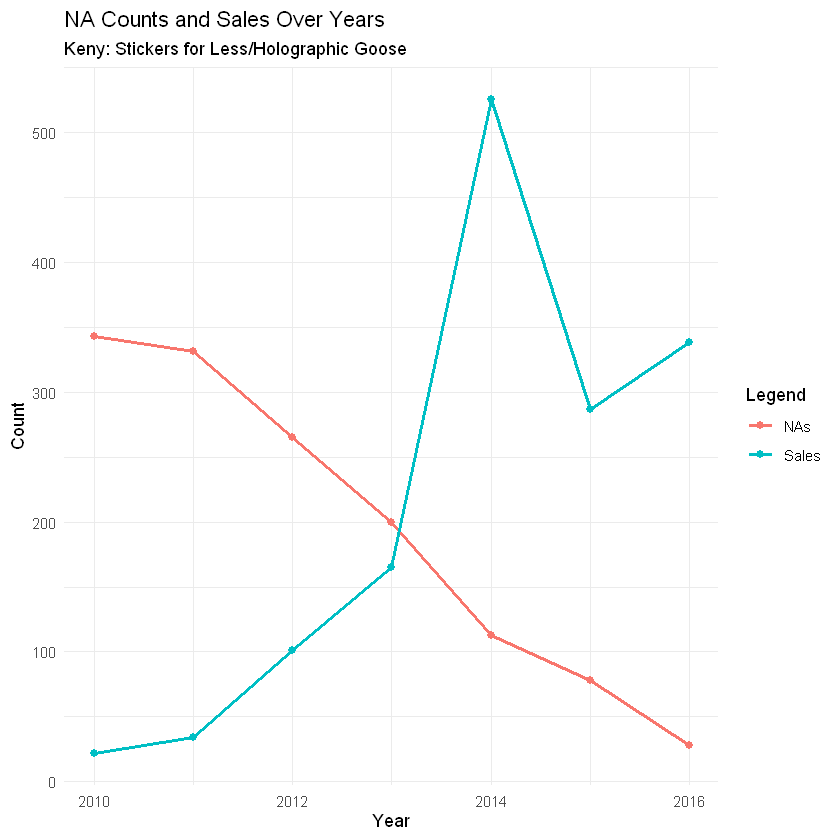

In [34]:
kenya_StickerforLess 

library(tidyr)

# Reshape data to long format
data_long <- kenya_StickerforLess  %>%
  pivot_longer(cols = c(NAs, Sales), names_to = "Type", values_to = "Count")

# Display the reshaped data (optional)
print(data_long)

# Create the plot
ggplot(data_long, aes(x = Yrs, y = Count, color = Type, group = Type)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(title = "NA Counts and Sales Over Years",
       subtitle = "Keny: Stickers for Less/Holographic Goose",
       x = "Year",
       y = "Count",
       color = "Legend") +
  theme_minimal()


### <font color = lime> group-by / date example:

In [35]:
test_sales <- kenya %>% filter( !is.na(num_sold) & product == "Holographic Goose" & store == "Stickers for Less" & year == "2010")
test_sales %>% filter(mo == "Jan") %>% summarize(sales = sum(num_sold))
head(test_sales,3)

sales
<dbl>
30


id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
50,2010-01-01,Kenya,Stickers for Less,Holographic Goose,5,2010,Jan,1,Fri
140,2010-01-02,Kenya,Stickers for Less,Holographic Goose,5,2010,Jan,2,Sat
230,2010-01-03,Kenya,Stickers for Less,Holographic Goose,5,2010,Jan,3,Sun


In [36]:
# Assuming your dataframe is named 'df'
# Group by month and summarize total sales for each month
monthly_data <- test_sales %>%
  mutate(month = floor_date(date, "month")) %>%
  group_by(month) %>%
  summarise(total_sales = sum(num_sold, na.rm = TRUE)) 

# Display the monthly data
print(monthly_data)
sum(monthly_data$total_sales)

# A tibble: 5 × 2
  month      total_sales
  <date>           <dbl>
1 2010-01-01          30
2 2010-02-01           5
3 2010-10-01           5
4 2010-11-01          20
5 2010-12-01          51


[1] 111

In [37]:
# Holographic Goose at the Stickers for Less stores
kenya_StickerforLess 

NAs,Sales,Yrs
<dbl>,<dbl>,<dbl>
343,22,2010
331,34,2011
265,101,2012
200,165,2013
113,525,2014
78,287,2015
28,338,2016


### <font color = lime> Kenya...||... (3) stores... || ... Holographic Goose (1) product

In [38]:
# sum(is.na(kenya))
cat("\n Sum of Kenya, all NA, current tally is : ", sum(is.na(kenya)), "\n\n")

dim(kenya %>% filter( is.na(num_sold) & product == "Holographic Goose" & store == "Stickers for Less"))   # 1358 x 10
dim(kenya %>% filter(!is.na(num_sold) & product == "Holographic Goose" & store == "Discount Stickers"))       # 0 x 10
dim(kenya %>% filter(is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart"))      # 646 x 10

# That elusive 64 is: 
dim(kenya %>% filter(store == "Discount Stickers" & is.na(num_sold)))    # Rather insignificant NA sales / tf full sales , T/F impute
target_ken_discount_stickers_kerneler <- kenya %>% filter(store == "Discount Stickers" & is.na(num_sold) & product =="Kerneler")    # 
("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
dim(target_ken_discount_stickers_kerneler)
("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
# 1358+646+64
cat("\n Sum of Kenya, all stores, all years NA are reconcilled, 1358+646+64 =  ", 1358+646+64, "\n\n")
sum(is.na(kenya))


 Sum of Kenya, all NA, current tally is :  2068 



[1] 1358   10

[1]  0 10

[1] 646  10

[1] 64 10

[1] "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

[1] 63 10

[1] "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"


 Sum of Kenya, all stores, all years NA are reconcilled, 1358+646+64 =   2068 



[1] 2068

### <font color = lime> Kenya: Premium Sticker Mart (store 2 / 3 )

In [39]:
dim(kenya %>% filter( !is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart"))        # 646 NA / 1911 sold
dim(kenya %>% filter( !is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart" & year == "2010"))   # 277 NA / 88
dim(kenya %>% filter( !is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart" & year == "2011"))   # 217  NA / 148
dim(kenya %>% filter( !is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart" & year == "2012"))   #  92 NA / 274 
dim(kenya %>% filter( !is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart" & year == "2013"))   #  48 NA / 317
dim(kenya %>% filter( !is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart" & year == "2014"))   #  10 NA/ 355
dim(kenya %>% filter( !is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart" & year == "2015"))   #  2  NA/ 363
dim(kenya %>% filter( !is.na(num_sold) & product == "Holographic Goose" & store == "Premium Sticker Mart" & year == "2016"))   #  0  NA/ 646  ???
277+217+92+48+10+2
88+148+274+317+355+363+646


[1] 1911   10

[1] 88 10

[1] 148  10

[1] 274  10

[1] 317  10

[1] 355  10

[1] 363  10

[1] 366  10

[1] 646

[1] 2191

NAs,Sales,Yrs
<dbl>,<dbl>,<dbl>
277,88,2010
217,148,2011
92,274,2012
48,317,2013
10,355,2014
2,363,2015
0,1012,2016


# A tibble: 14 × 3
     Yrs Type  Count
   <dbl> <chr> <dbl>
 1  2010 NAs     277
 2  2010 Sales    88
 3  2011 NAs     217
 4  2011 Sales   148
 5  2012 NAs      92
 6  2012 Sales   274
 7  2013 NAs      48
 8  2013 Sales   317
 9  2014 NAs      10
10  2014 Sales   355
11  2015 NAs       2
12  2015 Sales   363
13  2016 NAs       0
14  2016 Sales  1012


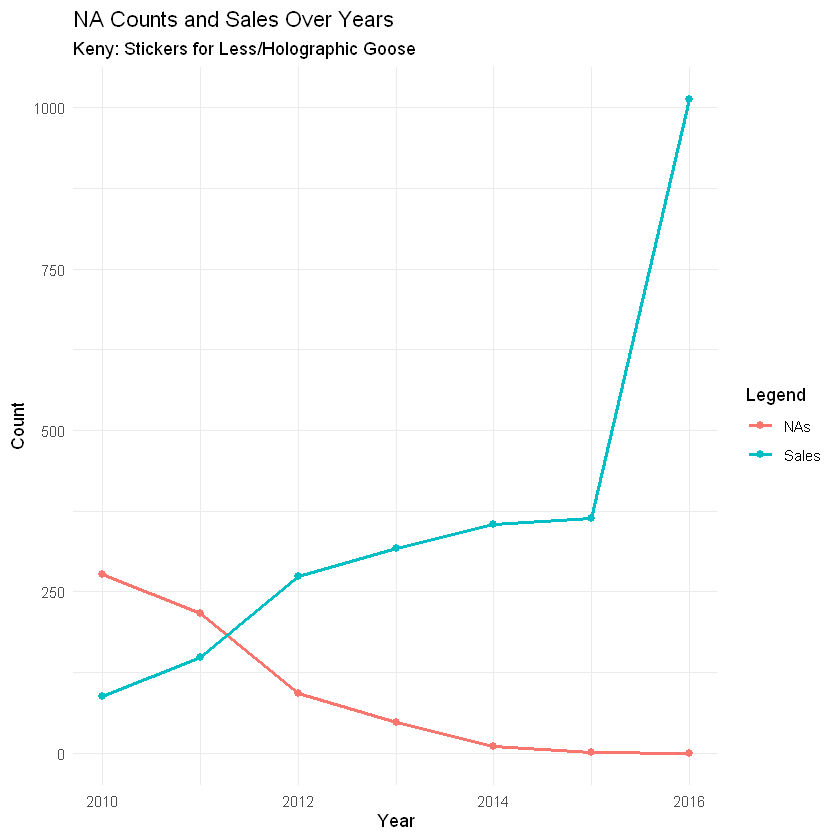

In [40]:
sticker_mart <- data.frame(NAs = c(277,217,92,48,10,2,0), Sales = c(88,148,274,317,355,363,366+646), Yrs = c(2010,2011,2012,2013,2014,2015,2016) )
sticker_mart

# Reshape data to long format
data_long <- sticker_mart %>%
  pivot_longer(cols = c(NAs, Sales), names_to = "Type", values_to = "Count")

# Display the reshaped data (optional)
print(data_long)

# Create the plot
ggplot(data_long, aes(x = Yrs, y = Count, color = Type, group = Type)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(title = "NA Counts and Sales Over Years",
       subtitle = "Keny: Stickers for Less/Holographic Goose",
       x = "Year",
       y = "Count",
       color = "Legend") +
  theme_minimal()


### <font color = lime> Impute Kenya 64: for all (two) years

In [41]:
dim(kenya %>% filter(store == "Discount Stickers" & is.na(num_sold) & product =="Kerneler")) 
dim(kenya %>% filter(store == "Discount Stickers" & is.na(num_sold) & product !="Kerneler")) # the odd ball is found
# id that odd ball
kenya %>% filter(store == "Discount Stickers" & is.na(num_sold) & product !="Kerneler")

dim(kenya %>% filter(store == "Discount Stickers" & is.na(num_sold) & product =="Kerneler" & year == "2010") )
dim(kenya %>% filter(store == "Discount Stickers" & is.na(num_sold) & product =="Kerneler" & year == "2011") )
dim(kenya %>% filter(store == "Discount Stickers" & is.na(num_sold) & product !="Kerneler")) # the odd ball is found
dim(kenya %>% filter(store == "Discount Stickers" & is.na(num_sold))) 

# Find the mean for replacment 
# kenya %>% filter(store == "Discount Stickers" & year == "2010" & product == "Kerneler Dark Mode" & mo == "Sep")
temp <- kenya %>% filter(store == "Discount Stickers" & year == "2010" & product == "Kerneler Dark Mode" ) 

temp1 <- temp %>% 
  filter(mo == "Sep") %>% 
  summarize(mean_sold = mean(num_sold, na.rm = TRUE))

temp1 <- c(temp1$mean_sold)  # convert tibble to vector for cat()

#temp %>% summarise(mean_num_sold = mean(num_sold))

cat("\n Loads of effort to get that mean for one Kerneler Dark Mode in Discount Stickers: ", temp1, "\n\n")
#get_mean <- kenya %>% filter(store == "Discount Stickers" & year == "2010" & product == "Kerneler Dark Mode" & mo == "Sep") 
#get_mean



dim(kenya %>% filter(store == "Discount Stickers" & is.na(num_sold))) 
dim(target_ken_discount_stickers_kerneler %>% filter(is.na(num_sold) & year == "2011") )
dim(target_ken_discount_stickers_kerneler %>% filter(year == "2010" ))  # 46
dim(target_ken_discount_stickers_kerneler %>% filter(year == "2011" ) ) # 17
dim(target_ken_discount_stickers_kerneler %>% filter(year == "2013" ))    # 0
dim(target_ken_discount_stickers_kerneler %>% filter(year == "2014" ))    # 0
dim(target_ken_discount_stickers_kerneler %>% filter(year == "2015" ))  # It is not the same parameter
dim(target_ken_discount_stickers_kerneler %>% filter(year == "2016" )) 
# kenya %>% filter(store == "Discount Stickers" & product == "kerneler
head(kenya %>% filter(store == "Discount Stickers" & is.na(num_sold) & product =="Kerneler")   )

# kenya %>% filter(store == "Discount Stickers" & !is.na(num_sold) & product =="Kerneler", mo == "Jan") 
# get_mean <- kenya %>% filter(store == "Discount Stickers" & !is.na(num_sold) & product =="Kerneler", year == "2016") %>% summarise(mean_num_sold = mean(num_sold))  

repl_yr <- c( 6,6,7,7, 8,9,9)  # and the oddball is ... 5
repl_yr

[1] 63 10

[1]  1 10

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
23719,2010-09-21,Kenya,Discount Stickers,Kerneler Dark Mode,NA,2010,Sep,21,Tue


[1] 46 10

[1] 17 10

[1]  1 10

[1] 64 10


 Loads of effort to get that mean for one Kerneler Dark Mode in Discount Stickers:  5.344828 



[1] 64 10

[1] 17 10

[1] 46 10

[1] 17 10

[1]  0 10

[1]  0 10

[1]  0 10

[1]  0 10

id,date,country,store,product,num_sold,year,mo,day,wkday
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<ord>,<int>,<ord>
1128,2010-01-13,Kenya,Discount Stickers,Kerneler,NA,2010,Jan,13,Wed
3108,2010-02-04,Kenya,Discount Stickers,Kerneler,NA,2010,Feb,4,Thu
3558,2010-02-09,Kenya,Discount Stickers,Kerneler,NA,2010,Feb,9,Tue
3738,2010-02-11,Kenya,Discount Stickers,Kerneler,NA,2010,Feb,11,Thu
4098,2010-02-15,Kenya,Discount Stickers,Kerneler,NA,2010,Feb,15,Mon
4188,2010-02-16,Kenya,Discount Stickers,Kerneler,NA,2010,Feb,16,Tue


[1] 6 6 7 7 8 9 9

# <font color = lime> Exec Decision: 

### <font color = yellow> Remove NA when NA > Sales, Replace NA w/ 0 when Sales > NA
### <font color = yellow> Proceed with model builds w/ flawed Canada NA data

In [42]:
sum(is.na(train))
sum(is.na(kenya))

[1] 3757

[1] 2068

In [43]:
stopper # After 64 imputed and ....# 95

ERROR: Error: object 'stopper' not found


In [ ]:
dim(canada_na %>% filter(store == "Stickers for Less"))
dim(canada_na %>% filter(store == "Premium Sticker Mart"))
dim(canada_na %>% filter(store == "Discount Stickers" ) )


cat("\n Total NA Canada are: ", 1308+380+1, "\n")
cat("\n Total remaining NA are counted in full:",  2068 + 1689, " Tally NA is: ", tally_na, "\n")

In [ ]:
#library(rle)

In [ ]:
store1 <- kenya_na %>% filter(store == "Stickers for Less")
dim(store1)
store1_indices <- store1$id
store2 <- kenya_na %>% filter(store == "Premium Sticker Mart")
dim(store2)
store2_indices <- store2$id
store3 <- kenya_na %>% filter(store == "Discount Stickers" ) 
dim(store3)
store3_indices <- store3$id
ken <- 1358+646+64
cat("\n The total NAs from the 3 store types in Kenya are: ", ken ,"\n\n")

## <font color = lime> Drill Down Canada NA:

In [ ]:
sum(is.na(canada_na))
head(canada_na)

In [ ]:
store1 <- canada_na %>% filter(store == "Stickers for Less")
dim(store1)
indices_store1 <- store1$id
store2 <- canada_na %>% filter(store == "Premium Sticker Mart")
dim(store2)
indices_store2 <- store2$id
store3 <- canada_na %>% filter(store == "Discount Stickers" ) 
dim(store3)
indices_store3 <- store3$id
can <- 1308 + 380+ 1

cat("\n The total NAs from the 3 store types in Canada are: ", can ,"\n\n")

# <font color = lime> Reconciled NAs:

### <font color = yellow> NAs in Kenya & Canada equal NA in train

In [ ]:
sum(is.na(train))
kencan <- can + ken
kencan
    

# <font color = lime> Function Call: df_year w/ ALL daily data (each yr)

In [ ]:
# Initialize the vector of years
yr <- c(2010, 2011, 2012, 2013, 2014, 2015, 2016)

for (i in 1:length(yr)) {
  # Generate the filtered data for the current year
  filtered_data <- get_filtered_year(yr[i])
  
  # Create a dynamic variable name
  var_name <- paste0("year_", yr[i])
  
  # Assign the filtered data to the dynamic variable name
  assign(var_name, filtered_data)
}

# Example: Display the content of the dynamically created dataframes
dim(year_2010)
dim(year_2011)
head(year_2010,3)


# <font color = lime> Monthly Array: ALL daily data (by month)

In [ ]:
# Generate a sequence of 12 months from January to December
months_array <- format(seq.Date(from = as.Date("2010-01-01"), to = as.Date("2010-12-01"), by = "month"), "%b")

# Generate an array to store the filtered data  (ALL Years)
month_list <- list()

# Loop through each month and filter the dataframe
for (month in months_array) {
  filtered_data <- train %>%
    filter(month(date, label = TRUE) == month & year(date) == 2010)
  month_list[[month]] <- filtered_data
}

dim(month_list$Jan)
head(month_list$Jan)


# <font color = yellow> Addional Patterns? Rebuild arrays w/ current train df

In [ ]:
dim(month_list$Jan)
str(month_list$Jan)
head(month_list$Jan)

In [ ]:
# Create array w/range of years
years_array <- seq(2010, 2016, by = 1)

# Generate an array to store the filtered data
year_list <- list()

# Loop through each year and filter the dataframe
for (year in years_array) {
  filtered_data <- train %>%
    filter(year == !!year)  # Use the correct variable inside the filter
  year_list[[as.character(year)]] <- filtered_data
}

# Function to return filtered data for a specific year
get_filtered_year <- function(year) {
  year_list[[as.character(year)]]
}

# Example: Accessing the dataframe for the year 2011
filtered_year_2011 <- get_filtered_year(2011)
print(dim(filtered_year_2011))
print(tail(filtered_year_2011, 10))

# Example: Accessing the dataframe for the year 2012
filtered_year_2012 <- get_filtered_year(2012)
print(dim(filtered_year_2012))
print(head(filtered_year_2012, 10))


In [ ]:
head(month_list$Jan)

In [ ]:
# Fct Call: pass 2010
year_2012 <- get_filtered_year(2012)
# print(dim(year_2010))
# head(year_2010, 2)

In [ ]:
# kenya_2010_na <- filter(year_2010, country == "Kenya" & is.na(num_sold) )
# dim(kenya_2010_na )
# dim(kenya_2010_na %>% distinct(day, .keep_all = TRUE))
na_2010 <- filter(year_2010, country == "Kenya", store == "Stickers for Less", is.na(num_sold) )  #, mo == "xyz")
dim(na_2010)
na_2011 <- filter(year_2011, country == "Kenya", store == "Stickers for Less", is.na(num_sold) )  #, mo == "xyz")
dim(na_2011)

na_2012 <- filter(year_2011, country == "Kenya", store == "Stickers for Less", is.na(num_sold) )  #, mo == "xyz")
dim(na_2012)

na_2013 <- filter(year_2011, country == "Kenya", store == "Stickers for Less", is.na(num_sold) )  #, mo == "xyz")
dim(na_2013)


na_2014 <- filter(year_2011, country == "Kenya", store == "Stickers for Less", is.na(num_sold) )  #, mo == "xyz")
dim(na_2014)


na_2015 <- filter(year_2011, country == "Kenya", store == "Stickers for Less", is.na(num_sold) )  #, mo == "xyz")
dim(na_2015)

na_2016 <- filter(year_2011, country == "Kenya", store == "Stickers for Less", is.na(num_sold) )  #, mo == "xyz")
dim(na_2016)


s <- 343 + (5*331)
cat("\n Total sequences of NA in filtered Kenya for 6 years are: 343+(331*5) ", s, " Most of these NA s/b replaced by 0 ??? Products? \n\n")

## <font color = lime> Pattern identified: 

##### - Total sequences of NA in filtered Kenya for 6 years are: 343+(331*5)  1998  Most of these NA s/b replaced by 0 ??? Products? 


In [ ]:
year_2011 <- get_filtered_year(2011)
year_2011 %>% filter(day == 1 & is.na(num_sold) & product == "Holographic Goose" & country == "Canada" & store == "Discount Stickers")

In [ ]:
summary(year_2011)

### <font color = lime> New Pattern: Each country, each store, sold Kaggle, every day during 

#### year_2011 %>% filter(product == "Kaggle" & !is.na(num_sold) )

-  2011 (6570 x 10) 6x3x365
-  2012 (6588 x 10)  6x3x365 + (6x3x365 x1)
-  2013 (6570 x 10)
-  2014 (6570 x 10)
-  2015 (6570 x 10)
-  2016 (6570 x 10)

In [ ]:
# product_df

## <font color = lime> Product Sales: One Yr.

In [ ]:
t(histogram_monthly_plot(2012))

In [ ]:
head(year_2010,1)

In [ ]:
6*3*365 
dim(year_2011 %>% filter(product == "Kaggle" & !is.na(num_sold) ))
dim(year_2011 %>% filter(product == "Kaggle Tiers" & !is.na(num_sold) ))
dim(year_2011 %>% filter(product == "Kerneler Dark Mode" & !is.na(num_sold) ))
 ("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")                        
dim(year_2011 %>% filter(product == "Kerneler" & !is.na(num_sold) ))
dim(year_2011 %>% filter(product == "Holographic Goose" & !is.na(num_sold) ))

In [ ]:
store_df

In [ ]:

dim(year_2011 %>% filter(store == "Stickers for Less" & !is.na(num_sold) & country == "Kenya" & product == "Holographic Goose"))    # 2010/2011.. Kenya- Holographic Goose- summer void
dim(year_2012 %>% filter(store == "Stickers for Less" & !is.na(num_sold) & country == "Kenya" & product == "Holographic Goose")) 
dim(year_2013 %>% filter(store == "Stickers for Less" & !is.na(num_sold) & country == "Kenya" & product == "Holographic Goose")) 
dim(year_2014 %>% filter(store == "Stickers for Less" & !is.na(num_sold) & country == "Kenya" & product == "Holographic Goose")) 
dim(year_2015 %>% filter(store == "Stickers for Less" & !is.na(num_sold) & country == "Kenya" & product == "Holographic Goose")) 
dim(year_2016 %>% filter(store == "Stickers for Less" & !is.na(num_sold) & country == "Kenya" & product == "Holographic Goose")) 

# ken_stickers_goose_yearly_sales_trend <- c(34,101,165,252,287,338)
# par(bg ="white")                                          
# plot(ken_stickers_goose_yearly_sales_trend)
# year_2011 %>% filter(store == "Discount Stickers" & is.na(num_sold))

## <font color = yellow> Fct CalL:  

In [ ]:
# Example usage with 'kaggle' as the product name
month_sales_na <- product_sales_and_na_mo(year_2010, "Kaggle")
print(month_sales_na)

In [ ]:
product_df

In [ ]:
year_2011 %>% filter(mo == "Jan")

In [ ]:
year_2011 %>% filter(country == "Kenya" & !is.na(num_sold) & product != "Holographic Goose")

In [ ]:
sum(is.na(year_2010))

In [ ]:
# Example usage with 'Kenya' as the country name
result <- country_sales_and_na_mo(year_2010, "Kenya")
print(result)

sum(result$count_na)
sum(result$total_sales)

In [ ]:
head(result, 12)

In [ ]:
K <- year_2010 %>% filter(country == "Kenya" )
sum(is.na(K))   
sum(K$num_sold, na.rm = TRUE)

In [ ]:
K

In [ ]:
result <- sum_sales_and_na_mo (year_2011, "kaggle")
result

In [ ]:
product_df

In [ ]:
stopper

In [ ]:
  
    # Apply the function to the filtered data
    test_sum_na <- count_na_per_month(year_2010)
    
    # Display the result (optional)
    #(print(head(test_sum_na, 12))
    
    # Perform a full join to combine count of NAs and total sales per month
    final_df <- full_join(test_sum_na, test_mo_na, by = "mo")
    
    # Display the final dataframe
    final_df

In [ ]:
# Summarize the count of NA values per month
count_na_per_month <- function(df) {
  df %>% 
    group_by(mo) %>% 
    summarise(count_na = sum(is.na(num_sold)))
}

# Apply the function to the filtered data
test_sum_na <- count_na_per_month(year_2010)

# Display the result (optional)
# head(test_sum_na,12)

# Summarize total sales per month
total_sales_per_month <- function(df) {
  df %>% 
    group_by(mo) %>% 
    summarise(total_sales = sum(num_sold, na.rm = TRUE))
}

# Apply the function to the filtered data
test_mo_na <- total_sales_per_month(test)

# Display the result (optional)
head(test_mo_na,12)


In [ ]:
# old pendind delete


dim(year_2010 %>% filter(store == "Discount Stickers" & is.na(num_sold) ) )  # likely s/b 0
test <- (year_2010 %>% filter(store == "Discount Stickers" & !is.na(num_sold) ) )  # likely s/b 0
test_sum_na <- test %>% group_by(mo) %>% summarize(count_na = sum(is.na(num_sold)))
head(test_sum_na,1)
test_mo_na <- monthly_group_by(test)
head(test_mo_na,12)
full_join(test_sum_na, test_mo_na, by = "mo")

In [ ]:
histogram_monthly_plot(2010)

### <font color = lime> New patterns: the mean of the sales from each country, store type, each year, seasonal ?? 

In [ ]:
t(country_df)
country_df[1,2]
# year_df <- data.frame(Num = c(1:7), Yr = c(2010,2011,2012,2013,2014,2015,2016) )
# year_df

In [ ]:
 summary(year_2011 %>% filter(country == country_df[4,2]  & store == "Discount Stickers" & product == "Kaggle" ))

In [ ]:
head(year_2011)

In [ ]:
train %>% filter(day == 1 & is.na(num_sold) & product == "Holographic Goose" & country == "Canada" & store == "Discount Stickers")
head(train, 2)

In [ ]:
train %>% filter(day == 1 & is.na(num_sold) )

In [ ]:
head(train, 2)

In [ ]:
rle_list <- rle(kenya_store1_nosales$num_sold)
str(rle_list)
rle_list$values

### <font color = yellow> Another pattern: Kenya > Stickers for Less > Holographic Goose  (is not consistant through df) 
##### w/in the 90 day series, there are some/not all NA  (1356 NAs ) w/ mean value of the group about 5 or 6 

##### There is yet another pattern (+5 ) from the other, but replacement w/ 5 or 6 will address ? 

### <font color = yellow> Explore moving the month


In [ ]:
tester$date[1] + months(3)


In [ ]:
# Start a new month, then subset
# head(kenya_mo1, 2)
# c <- kenya_mo1$date[1] + months(1)
# c
# kenya_mo1 %>% filter(month(date) == 2 )

### <font color = lime> logical subsetting by the month (ALL YEARS)

In [ ]:
#  month(kenya_df2$date) == 2

In [ ]:
# This is returning ALL the february (each year) 
tail(kenya_df2[month(kenya_df2$date) == 2, ])

In [ ]:
# Filter for February using dplyr (returns ALL years / February)
feb_data <- kenya_df2 %>% filter(month(date) == 2)
dim(feb_data)  # All years
head(feb_data, 2)
tail(feb_data, 2)
summary(feb_data)

### <font color = yellow> The dim is correctly, 365  == days in year

In [ ]:
# Filters all days in 2011 (kenya / Stickers for Less / Holographic Goose
daily_data_2011 <- kenya_df2 %>% filter(year(date) == 2011) #  && year(date) == 2011)
dim(daily_data_2011)  


head(daily_data_2011,2)
tail(daily_data_2011,2)

In [ ]:
length(daily_data_2011$date)
tail(daily_data_2011$date)

In [ ]:
# Create the density plot
data <- daily_data_2011
ggplot(data, aes(x = num_sold)) +
  geom_density(fill = "skyblue", alpha = 0.5) +
  labs(title = "Density Plot of Values",
       x = "Value",
       y = "Density") +
  theme_minimal()


In [ ]:
# Filter kenya_df2 to include only rows where the month is February
feb_data <- kenya_df2 %>%
  filter(month(date) == 2) %>%
  mutate(year = year(date)) %>%  # Extract year from date
  group_by(year)

# Display the grouped data
dim(feb_data)
print(feb_data)


feb_data_2010 <- feb_data %>% filter(year == 2010)
dim(feb_data_2010)
feb_data_2010


## <font color = lime> Function: returns daily data for a single month / Yr

In [ ]:
# fct: to filter the passed month and year and return the daily data for the month/year that gets passed

mo_year <- function (mo, yr) {
 filtered_data <- kenya_df2 %>%
  filter(month(date) == mo) %>%
  mutate(year = year(date)) %>%  # Extract year from date
  group_by(year)
  filtered_data$day_of_week <- wday(filtered_data$date, label = TRUE)
  return(filtered_data)
}

## <font color = lime> New Pattern: Kenya / Sunday sales

- Sunday sales.
-   2/21/10 - 10/24/10 - NO SALES / s/b 0 ?
-   After 11/14/ - 12/31 Sunday Sales (missing 1 )
-   Jan - Feb - probably 3 or 4 missing Sunday sales

### <font color = lime> Fct Call:

In [ ]:
# Function call: pass the mo/yr to get daily data passed in return
yr <- 2012
mo <- 12
month_year <- mo_year(mo, yr)  %>% filter(year == yr)
dim(month_year)
head(month_year,2)
# Add the day of week to the data
# month_year$day_of_week <- wday(month_year$date, label = TRUE)
# month_year

## <font color = lime>  all days / all years |  kenya_df2

In [ ]:
# Add a column for the day of the week
kenya_df2 <- kenya_df2 %>%
  mutate(year = year(date), month = month(date, label = TRUE), day_of_week = wday(date, label = TRUE))

# Display the dataframe with the new column

7*365 # Note data will include 2 days from leap years (2012 and 2016) 
2012 / 4  # leap year

dim(kenya_df2 )  # all days for 7 years
head(kenya_df2, 2) 
tail(kenya_df2, 2)


In [ ]:
# Review for patterns 
kenya_df2

In [ ]:
# Filter the dataframe for Sundays
kenya_sunday <- kenya_df2 %>%
  filter(day_of_week == "Sun")

# Display the filtered data ( output is weekly on Sundays - all years
sum(is.na(kenya_sunday))
dim(kenya_sunday)
head(kenya_sunday)
tail(kenya_sunday, 2)


# <font color = lime> Function: filter goose to single year / replace NA w/ 0

In [ ]:
annual_sunday_goose <- function(df,yr) {
    sunday_goose <- df %>% filter(year(date) == yr)
    # Create a modified count column to adjust the height of "No Sale" bars
    # sunday_goose <- sunday_goose %>%
           # mutate(num_sold = ifelse(is.na(num_sold), 0, num_sold))
    return(sunday_goose)
    }

## <font color = lime> Fct Call: annual_sunday_goose (create yearly goose)

In [ ]:
goose2010 <- annual_sunday_goose(kenya_sunday, 2010)
dim(goose2010)   # good ... s/b 52 week of the year

sum(is.na(goose2010))
head(goose2010, 2)


In [ ]:
sum(is.na(goose2010$num_sold))

In [ ]:
histogram_plot <- function(df) {

    # Extract the year from the date column 
    year_value <- as.character(format(min(df$date), "%Y"))
    
    plot_goose <- ggplot(df, aes(x = date, y = num_sold)) +
          geom_col(fill = "skyblue", alpha = 0.8) +
          labs(title = paste("Weekly Sales /", year_value),
               x = "Date",
               y = "Number of Sales") +
          theme_minimal()
    return(plot_goose)
    }

In [ ]:
goose_plot2010 <- histogram_plot(goose2010)
goose_plot2010

## <font color = lime> Fct Calls: 1. annual_goose_sunday 2. histogram_plot

In [ ]:
# fct calls

goose2010<- annual_sunday_goose(kenya_sunday, 2010)
goose_plot2010 <- histogram_plot(goose2010)
# goose_plot2010


goose2011<- annual_sunday_goose(kenya_sunday, 2011)
goose_plot2011 <- histogram_plot(goose2011)
# goose_plot2011

goose2012<- annual_sunday_goose(kenya_sunday, 2012)
goose_plot2012 <- histogram_plot(goose2012)
# goose_plot2012

goose2013<- annual_sunday_goose(kenya_sunday, 2013)
goose_plot2013 <- histogram_plot(goose2013)
# goose_plot2013


goose2014<- annual_sunday_goose(kenya_sunday, 2014)
goose_plot2014 <- histogram_plot(goose2014)
# goose_plot2014


goose2015<- annual_sunday_goose(kenya_sunday, 2015)
goose_plot2015 <- histogram_plot(goose2015)
# goose_plot2015

goose2016<- annual_sunday_goose(kenya_sunday, 2016)
goose_plot2016 <- histogram_plot(goose2016)
# goose_plot2016

# Combine the plots into a grid with updated names
grid.arrange(goose_plot2010, goose_plot2011, goose_plot2012,
             goose_plot2013, goose_plot2014, goose_plot2015,
             goose_plot2016, ncol = 3, nrow = 3)

In [ ]:
sum(is.na(goose2010))
goose2010$num_sold
head(goose2010)

### <font color = yellow> The Plan: mid_yr empty region will be zero, outside NA become mean ... aka 5


In [ ]:
# Calculate the mid-point of the year
mid_date <- as.Date(paste0(unique(format(goose2010$date, "%Y")), "-07-01"))
mid_date

# <font color = lime> Function: from mid-year, find left/Rt sides of empty zone  # 140

In [ ]:
zero_space <- function(df) {
    # Calculate the mid-point of the year
    mid_date <- as.Date(paste0(unique(format(df$date, "%Y")), "-07-01"))
    # Filter dates with sales
    sales_dates <- df %>%
      filter(num_sold > 0)
    
    # Split the data into two halves around the mid-point
    left_side <- sales_dates %>% filter(date < mid_date)
    right_side <- sales_dates %>% filter(date > mid_date)
    
    # Find the nearest sale date on each side
    left_sale_date <- left_side %>% arrange(desc(date)) %>% slice(1) %>% pull(date)
    right_sale_date <- right_side %>% arrange(date) %>% slice(1) %>% pull(date)
    
    left_sale_date
    right_sale_date
    zero_space <- data.frame(Side = c("left", "right"), Date = c(left_sale_date, right_sale_date) )
    return(zero_space)
    }
    


## <font color = lime> Fct Call: get left/right date boundaries of empty space

In [ ]:
# fct call  testingthe fct call
zero_spaces <- zero_space(goose2010)
zero_spaces
left_zero_space <- zero_spaces$Date[1]
right_zero_space <- zero_spaces$Date[2]

left_zero_space
right_zero_space

In [ ]:
# Get boundaries (left / right date)  of the empty space
zero_zone2010 <- zero_space(goose2010)

# Show the rows / boundaries
goose2010 %>% filter(date %in% zero_zone2010$Date[1:2])

zero_zone2010$Date[1]
zero_zone2010$Date[2]


# <font color = lime> Function: Remove / Replace outside NA (from gooseX) in from kenya_df2 

In [ ]:


# zero_space()  Passed the date boundaries of empty space (lst), Fills void with replace_value, enter googe20xx 

remove_patterned_NAs <- function (lst, replace_value, goose) {

    # Use lapply to iterate over the list and assign each vector to a variable
  lapply(seq_along(lst), function(i) {
    assign(paste0("vec", i), lst[[i]], envir = .GlobalEnv)
  })

    message(paste("\n The value of na_1 is: ", vec1, "\n"))
    str(vec1)
    str(vec2)
    message(paste("\n The value of na_1 is: ", vec2, "\n"))
    print(sum(is.na(kenya_df2$num_sold)))
              
    kenya_df2$num_sold[vec1] <<- replace_value
    kenya_df2$num_sold[vec2] <<- replace_value
    
    print(sum(is.na(kenya_df2$num_sold)))
   
    }




head(goose2010, 3)  # FMI ref / compare  

## <font color = lime> Replace outside NAs (intermit NAs) with the common value == 5 (mean / mode)

In [ ]:
# Get the indices from the start of the year until and including the left_date  (part 1)
left_indices <- which(goose2010$date >= as.Date("2010-01-01") & goose2010$date <= zero_zone2010$Date[1])
# Get the indices from the right_date to the end of the year
right_indices <- which(goose2010$date >= zero_zone2010$Date[2] & goose2010$date <= as.Date("2010-12-31"))


# Indices for the left range
left_na_indices <- which(is.na(goose2010$num_sold[left_indices]))
left_na_indices <- left_indices[left_na_indices]
# Indices for the right range
right_na_indices <- which(is.na(goose2010$num_sold[right_indices]))
right_na_indices <- right_indices[right_na_indices]

print(left_na_indices)
print(right_na_indices)


# # Count NA values in the left range
# left_na_count <- length(left_na_indices)
# right_na_count <- length(right_na_indices)
# # Display the left NA count and indices
# print(left_na_count)
# print(right_na_count)


In [ ]:
cat("\n The goose2010 NAs are: ", sum(is.na(goose2010)), "\n\n")
cat("\n The kenya_na2$num_sold NAs are: ", sum(is.na(kenya_df2$num_sold)), "\n\n")

In [ ]:
# create a list to pass to fct

lf_rt_na_indices <- list(left_na_indices, right_na_indices)

left_date <- zero_zone2010$Date[1]
right_date <- zero_zone2010$Date[2]
left_date
right_date

# Get the indices between the left_date and right_date
between_indices <- which(goose2010$date > left_date & goose2010$date < right_date)
between_indices


cat("\n The length of the goose void is: ", length(between_indices), "\n")
cat("\n sum goose NA before filling void ", sum(is.na(goose2010)), "\n")



In [ ]:
goose2010$num_sold[between_indices]
kenya_df2$num_sold[between_indices]

In [ ]:
# Replace NA values with 0 within the specified range
goose2010$num_sold[between_indices][is.na(goose2010$num_sold[between_indices])] <- 0
# Replace NA values with 0 within the specified range
kenya_df2$num_sold[between_indices][is.na(kenya_df2$num_sold[between_indices])] <- 0

cat("\n sum kenya_df2 NAs after filling void: ", sum(is.na(kenya_df2)), "\n\n")



In [ ]:
goose2010$num_sold[between_indices]
kenya_df2$num_sold[between_indices]

In [ ]:
cat("\n The goose2010 NAs are: ", sum(is.na(goose2010)), "\n\n")
cat("\n The kenya_na2$num_sold NAs are: ", sum(is.na(kenya_df2$num_sold)), "\n\n")

# <font color = lime> Non-fct Call: 

In [ ]:
# Include the value that will replace the NA in the outer sides

m <- 5     # the replament value
kenya_df2[left_na_indices,]  
kenya_df2[right_na_indices,]

# Update the dataframe directly at the specified indices 
kenya_df2$num_sold[left_na_indices] <- 5 
kenya_df2$num_sold[right_na_indices] <- 5

kenya_df2[left_na_indices,]  
kenya_df2[right_na_indices,]  


In [ ]:
sum(is.na(kenya_df2$num_sold))
dim(kenya_df2)

## <font color = yellow> Some odd day NAs - req trend exp

In [ ]:
# Filtering kenya_df2 the hard way
kenya_df2 %>% filter(month == "Feb" & year == "2010")


### <font color = yellow> All years: kenya ... // daily detail


In [ ]:
dim(kenya_df2)

# <font color = lime> Array: Months of Kenya_df2 ..// ... / daily detail

In [ ]:
# Generate a sequence of 12 months from January to December
months_array <- format(seq.Date(from = as.Date("2010-01-01"), to = as.Date("2010-12-01"), by = "month"), "%b")
#print(months_array)

# Generate an array to store the filtered data  (ALL Years)
filtered_data_list <- list()

# Loop through each month and filter the dataframe
for (month in months_array) {
  filtered_data <- kenya_df2 %>%
    filter(month(date, label = TRUE) == month & year(date) == 2010)
  filtered_data_list[[month]] <- filtered_data
}

# Display the filtered data for each month
# for (month in months_array) {
  # cat("Data for:", month, "\n")
  # print(filtered_data_list[[month]])
#}
#str(filtered_data_list)
tail(filtered_data_list$Jan)


In [ ]:
head(kenya_df2, 2)

# <font color = lime> Array: Years of Kenya_df..// ... / daily detail



In [ ]:
# Generate a sequence of 7 years starting from 2010
years_array <- seq(2010, 2016, by = 1)

# Add a 'year' column to the dataframe
kenya_df2 <- kenya_df2 %>%
  mutate(year = year(date))

# Generate a sequence of 7 years starting from 2010
years_array <- seq(2010, 2016, by = 1)

# Generate an array to store the filtered data
filtered_data_year_list <- list()

# Loop through each year and filter the dataframe
for (year in years_array) {
  filtered_data <- kenya_df2 %>%
    filter(year == !!year)  # Use the correct variable inside the filter
  filtered_data_year_list[[as.character(year)]] <- filtered_data
}

# Function to return filtered data for a specific year
get_data_for_year <- function(year) {
  filtered_data_year_list[[as.character(year)]]
}

# Example: Accessing the dataframe for the year 2011
filtered_data_2011 <- get_data_for_year(2011)
dim(filtered_data_2011)
head(filtered_data_2011, 30)


# Example: Accessing the dataframe for the year 2012
filtered_data_2012 <- get_data_for_year(2012)
dim(filtered_data_2012)
# print(filtered_data_2012)



In [ ]:
# library(dplyr)
# library(lubridate)

# # Sample dataframe kenya_df2
# kenya_df2 <- data.frame(
#   date = as.Date(c("2010-01-03", "2010-01-10", "2010-01-17", "2010-01-24", "2010-01-31",
#                    "2010-02-07", "2010-02-14", "2010-02-21", "2010-02-28", "2010-03-07")),
#   num_sold = c(5, 5, 5, 5, NA, 0, 0, 5, 0, NA)
# )

# Add week number and year-week columns to the dataframe starting from the 1st of each month
kenya_df2 <- kenya_df2 %>%
  mutate(month = month(date),
         day_of_month = day(date),
         start_of_month = floor_date(date, "month"),
         week_in_month = ceiling((day_of_month + wday(start_of_month) - 1) / 7))

# Display the updated dataframe with week_in_month
head(kenya_df2, 35)



In [ ]:

stopper

## <font color = lime> Remaining NA in goose2010

In [ ]:
sum(is.na(goose2010))
head(goose2010,10)

In [ ]:
goose_plot2010 <- histogram_plot(goose2010)
goose_plot2010

# <font color = lime> Function: replace NA w/ 0

In [ ]:
make_zero_sale <- function(df,yr) {
    sunday_goose <- df %>% filter(year(date) == yr)
    # Create a modified count column to adjust the height of "No Sale" bars
     sunday_goose <- sunday_goose %>%
            mutate(num_sold = ifelse(is.na(num_sold), 0, num_sold))
    return(sunday_goose)
    }



### <font color = lime> Fct Call: 

In [ ]:
goose2010 <- make_zero_sale(goose2010, 2010)
head(goose2010,10)                           # looks good: all na to 0

In [ ]:
# Check NAs
sum(is.na(goose2010))
head(goose2010,2)
# tail(goose2010)

In [ ]:
sum(is.na(kenya_df2))

In [ ]:
stopper

# <font color = lime> NA's update: 40 NA gone from goose2010

#### Now repeat for goose2011 - 2016

In [ ]:
goose2011 <- annual_sunday_goose(kenya_sunday, 2011)   # create geese


# fct 
zero_spaces <- zero_space(goose2011)
# zero_spaces

left_zero_space <- zero_spaces$Date[1]
right_zero_space <- zero_spaces$Date[2]

# left_zero_space
# right_zero_space

zero_zone2011 <- zero_space(goose2011)
zero_zone2011

# get the boundaries
goose2011 %>% filter(date %in% zero_zone2011$Date[1:2])



In [ ]:
cat("\n The NAs in goose2011 are: ", sum(is.na(goose2011)), "\n\n")

In [ ]:
# Get the indices from the start of the year until and including the left_date
left_indices <- which(goose2011$date >= as.Date("2011-01-01") & goose2011$date <= zero_zone2011$Date[1])
# Get the indices from the right_date to the end of the year
right_indices <- which(goose2011$date >= zero_zone2011$Date[2] & goose2011$date <= as.Date("2011-12-31"))

# Display the indices
print(left_indices)
print(right_indices)

# Direct replacement: subset 
goose2011$num_sold[left_indices]  <- 5
goose2011$num_sold[right_indices]  <- 5 

cat("\n The NAs in goose2011 are: ", sum(is.na(goose2011)), "\n\n")
tail(goose2011, 2) 

In [ ]:
# fct Call
goose2011 <- make_zero_sale(goose2011, 2011)
head(goose2011,2)    
cat("\n The NAs in goose2011 are: ", sum(is.na(goose2011)), "\n\n")

In [ ]:
histogram_plot(goose2011)


# <font color = lime> NA's update: 32 NA gone from goose2011

In [ ]:
# fct call
goose2012 <- annual_sunday_goose(kenya_sunday, 2012)   # create geese

# fct call
zero_spaces <- zero_space(goose2012)

left_zero_space <- zero_spaces$Date[1]
right_zero_space <- zero_spaces$Date[2]
# fct call
zero_zone2012 <- zero_space(goose2012)
zero_zone2012

# get the boundaries
goose2012 %>% filter(date %in% zero_zone2012$Date[1:2])


In [ ]:
cat("\n The NAs in goose2012 are: ", sum(is.na(goose2012)), "\n\n")

In [ ]:
# Get the indices from the start of the year until and including the left_date
left_indices <- which(goose2012$date >= as.Date("2012-01-01") & goose2012$date <= zero_zone2012$Date[1])
# Get the indices from the right_date to the end of the year
right_indices <- which(goose2012$date >= zero_zone2012$Date[2] & goose2012$date <= as.Date("2012-12-31"))

# Display the indices
print(left_indices)
print(right_indices)

# Direct replacement: subset 
goose2012$num_sold[left_indices]  <- 5
goose2012$num_sold[right_indices]  <- 5 

cat("\n The NAs in goose2012 are: ", sum(is.na(goose2012)), "\n\n")
tail(goose2012, 2) 

In [ ]:
# fct Call
goose2012 <- make_zero_sale(goose2012, 2012)
head(goose2012,2)    
cat("\n The NAs in goose2012 are: ", sum(is.na(goose2012)), "\n\n")

In [ ]:
histogram_plot(goose2012)


# <font color = lime> NA's update: 14 NA gone from goose2012

In [ ]:
# fct call
goose2013 <- annual_sunday_goose(kenya_sunday, 2013)   # create geese
cat("\n The NAs in goose2012 are: ", sum(is.na(goose2013)), "\n\n")

# fct call
zero_spaces <- zero_space(goose2013)    # 137

left_zero_space <- zero_spaces$Date[1]
right_zero_space <- zero_spaces$Date[2]
# fct call
zero_zone2013 <- zero_space(goose2013)
zero_zone2013

# get the boundaries
goose2013 %>% filter(date %in% zero_zone2013$Date[1:2])

In [ ]:
cat("\n The NAs in goose2012 are: ", sum(is.na(goose2013)), "\n\n")

In [ ]:
# Get the indices from the start of the year until and including the left_date
left_indices <- which(goose2013$date >= as.Date("2013-01-01") & goose2013$date <= zero_zone2013$Date[1])
# Get the indices from the right_date to the end of the year
right_indices <- which(goose2013$date >= zero_zone2013$Date[2] & goose2013$date <= as.Date("2013-12-31"))

# Display the indices
print(left_indices)
print(right_indices)

# Direct replacement: subset 
goose2013$num_sold[left_indices]  <- 5
goose2013$num_sold[right_indices]  <- 5 

cat("\n The NAs in goose2013 are: ", sum(is.na(goose2013)), "\n\n")
tail(goose2013, 2)

In [ ]:
 # fct Call
goose2013 <- make_zero_sale(goose2013, 2013)
head(goose2013,2)    
cat("\n The NAs in goose2013 are: ", sum(is.na(goose2013)), "\n\n")

In [ ]:
histogram_plot(goose2013)

# <font color = lime> NA's update: 3 NA gone from goose2013

In [ ]:
stopper 

In [ ]:
annual_sunday_goose(
g2010 <- goose2010$id
length(g2010)
g2010

# <font color = lime> Escape to Surface ... kenya_df2 

### Re: kenya_df2 is just a subset of tester

#### Reduce the NA's in kenya_df2 by 89 NAs, Keep exploring kenya_df2 for patterns 

In [ ]:
sum(is.na(kenya_sunday))   # 89
dim(kenya_sunday)      # kenya_df2 %>% filter(day_of_week == "Sun")  365 x 7
dim(kenya_df2)           # 2557 x 6

n <- nrow(training)      # 230130
n

kenya_na <- seq(from = 46, to = n, by = 90)  # sequencer
length(kenya_na)                        # 2557
head(kenya_na)     # sequencer   46 136 226 316 406 496  (by 90 rows)

# subset tester w/ the kenya na vector
kenya_2na <- seq(from = 51, to = 230129, by = 90)  #   seqencer
length(kenya_2na)
head(tester[kenya_2na[ ], ],3  )      # reveals output
kenya_df2 <- tester[kenya_2na[ ], ]  # subset tester w/ Kenya sequencer
cat("\n The dim of kenya_df2 is: ", dim(kenya_df2), " There is no kenya_df1\n\n")

sum(is.na(kenya_df2))   # / s/b 1358
sum(is.na(tester))

head(kenya_df2,2)

In [ ]:
sum(is.na(tester))

In [ ]:
sum(is.na(tester))

## <font color = lime> kenya_df2 <- Kenya_df2(dates), ALL years #195

- Expand kenya_df2 to include new columns for Yr, Mon, Day

In [ ]:
# crude techniques to attempt filtering by months
kenya_mo1 <- kenya_df2[0:31, ]
# etc ...
kenya_mo2 <- kenya_df2[32:59, ]

head(kenya_mo2,2)

In [ ]:
names(kenya_df2)

In [ ]:
kenya_df2 <- kenya_df2 %>% mutate(Yr = year(date), Mon = month(date), Day = day(date) )

In [ ]:
# Extract the num_sold pattern
pattern <- kenya_df2$num_sold

# Identify gaps of NA
na_gaps <- rle(is.na(pattern))$lengths

# Extract the length of non-NA and NA segments
na_intervals <- na_gaps[!is.na(rle(is.na(pattern))$values)]
non_na_intervals <- na_gaps[is.na(rle(is.na(pattern))$values)]

# Display the results
list(non_na_intervals = non_na_intervals, na_intervals = na_intervals)

In [ ]:
stopper

In [ ]:
# Plot the NA counts using ggplot2
ggplot(monthly_na_counts, aes(x = month, y = na_count)) +
  geom_bar(stat = "identity", fill = "coral") +
  labs(title = "Number of NAs in num_sold Each Month",
       x = "Month",
       y = "Number of NAs") +
  theme_minimal()


In [ ]:
# Filter data for January
january_data <- kenya_df2 %>%
  filter(month(date) == 1)

# Calculate the daily NA counts in num_sold
daily_na_counts <- january_data %>%
  group_by(date) %>%
  summarise(na_count = sum(is.na(num_sold)))

# Display the NA counts
print(daily_na_counts)


In [ ]:
# Filter data for January of the first year
january_first_year_data <- kenya_df2 %>%
  filter(year(date) == min(year(date)) & month(date) == 1)

# Calculate the daily NA counts in num_sold
daily_na_counts_first_year <- january_first_year_data %>%
  group_by(date) %>%
  summarise(na_count = sum(is.na(num_sold)))

# Display the NA counts
print(daily_na_counts_first_year)


In [ ]:
# Filter data for January of the first year
january_first_year_data <- kenya_df2 %>%
  filter(year(date) == min(year(date)) & month(date) == 1)

# Calculate the daily NA counts in num_sold
daily_na_counts_first_year2 <- january_first_year_data %>%
  group_by(date) %>%
  summarise(na_count = sum(is.na(num_sold)))

# Display the NA counts
print(daily_na_counts_first_year2)


In [ ]:
two_month_combined_df <- bind_rows(daily_na_counts_first_year, daily_na_counts_first_year2)
two_month_combined_df

In [ ]:
# Filter data for the first year
first_year_data <- kenya_df2 %>%
  filter(year(date) == min(year(date)))

# Calculate the number of NAs in `num_sold` for each quarter
quarterly_na_counts <- first_year_data %>%
  mutate(quarter = quarter(date, with_year = FALSE)) %>%
  group_by(quarter) %>%
  summarise(na_count = sum(is.na(num_sold)))

# Display the NA counts
print(quarterly_na_counts)


In [ ]:
# Plot the quarterly NA counts using ggplot2
ggplot(quarterly_na_counts, aes(x = as.factor(quarter), y = na_count)) +
  geom_bar(stat = "identity", fill = "mediumseagreen") +
  labs(title = "Number of NAs in num_sold for Each Quarter of the First Year",
       x = "Quarter",
       y = "Number of NAs") +
  theme_minimal()


In [ ]:
# Apply rle() to the vector
rle_result <- rle(filtered_data$num_sold)

# Display the result
str(rle_result)
print(rle_result)

In [ ]:
library(dplyr)

# Extract the num_sold pattern
pattern <- kenya_df2$num_sold

# Identify gaps of NA
na_gaps <- rle(is.na(pattern))$lengths

# Extract the length of non-NA and NA segments
na_intervals <- na_gaps[!is.na(rle(is.na(pattern))$values)]
non_na_intervals <- na_gaps[is.na(rle(is.na(pattern))$values)]

# Display the results
list(non_na_intervals = non_na_intervals, na_intervals = na_intervals)


In [ ]:
na_gaps

In [ ]:
na_intervals 

In [ ]:
#  More 90's ???
difs <- dplyr::symdiff(kenya_mo1, kenya_mo2)
dim(difs)
difs

In [ ]:
kenya_mo1[1:5,]
kenya_mo1[5, ]   # index number 5 in df
kenya_mo1$date[5]

In [ ]:
Stopper

# <font color = lime> New Pattern:

#### <font color = yellow> Intermit sales on Sundays in non-summer months of 5 that increase each year from 5 daily sales to 6-7

In [ ]:
# Explore w/ parameters daily / kenya / store / Holographic Google
nonpop_product <- kenya_df2 %>%
  filter(country == "Kenya" & product == "Holographic Goose" & is.na(num_sold) )

In [ ]:
#  The days of week w/ a sale (all 7 years)
365*7 + 2
#  1358  sum(is.na)
dim(kenya_goose_na)
sum(is.na(nonpop_product$num_sold))  # sum of na is 1358  & sum of !na is 1199
1358+1199                             # sum matches 365 * 7 + 2 
head(nonpop_product, 1)
tail(nonpop_product,3)

# <font color = lime> NA math ... updates

- (tally_na) = 3557
- less
- (NA pattern : kenya / Stickers for Less / Goose) = 2557 || 1358
- = 1000 unknown / unpatterned NA remaining  || 1299

In [ ]:
stopper

In [ ]:
tally_na

In [ ]:
stopper

 ## <font color = lime> Mean/Avg Sale / Sunday / Years || NA Replacement values or 0

In [ ]:
# filter by year and determine ave sales from those sunday sales each year
sundays %>% group_by(year(date)) %>% summarize(Avg = mean(num_sold))

In [ ]:
# Create a daily histogram for sales vs. no sales with adjusted heights
ggplot(sunday_goose, aes(x = date, fill = sale_indicator, weight = modified_count)) +
  geom_histogram(binwidth = 1, position = "identity", alpha = 0.7) +
  labs(title = "Daily Sales vs. No Sales Pattern",
       x = "Date",
       y = "Count",
       fill = "Sale Indicator") +
  theme_minimal() +
  scale_fill_manual(values = c("No Sale" = "red", "Sale" = "green"))


In [ ]:
# filter by sundays
dim(nonpop_product)
365*7
sundays <- nonpop_product %>% group_by(date) %>% filter(day_of_week == "Sun")  # all years
dim(sundays)
52*7

head(sundays, 2)
tail(sundays,2)


# filter again by year
sundays %>% filter(year(date) == 2010)    # Sundays sale in year
sundays2010 <- sundays %>% filter(year(date) == 2010)    # Sundays sale in year


In [ ]:
# Create the density plot
data <- sundays2010
ggplot(data, aes(x = date)) +
  geom_density(fill = "skyblue", alpha = 0.5) +
  labs(title = "Density Plot of Values",
       x = "Value",
       y = "Density") +
  theme_minimal()

In [ ]:
sundays2010

In [ ]:
# Create individual density plots with updated titles
plot_sundays2010 <- ggplot(sundays2010, aes(x = date)) +
  geom_density(fill = "skyblue", alpha = 0.5) +
  labs(title = "sundays2010",
       x = "Date",
       y = "Density") +
  theme_minimal()

plot_sundays2011 <- ggplot(sundays2011, aes(x = date)) +
  geom_density(fill = "skyblue", alpha = 0.5) +
  labs(title = "sundays2011",
       x = "Date",
       y = "Density") +
  theme_minimal()

plot_sundays2012 <- ggplot(sundays2012, aes(x = date)) +
  geom_density(fill = "skyblue", alpha = 0.5) +
  labs(title = "sundays2012",
       x = "Date",
       y = "Density") +
  theme_minimal()

plot_sundays2013 <- ggplot(sundays2013, aes(x = date)) +
  geom_density(fill = "skyblue", alpha = 0.5) +
  labs(title = "sundays2013",
       x = "Date",
       y = "Density") +
  theme_minimal()

plot_sundays2014 <- ggplot(sundays2014, aes(x = date)) +
  geom_density(fill = "skyblue", alpha = 0.5) +
  labs(title = "sundays2014",
       x = "Date",
       y = "Density") +
  theme_minimal()

plot_sundays2015 <- ggplot(sundays2015, aes(x = date)) +
  geom_density(fill = "skyblue", alpha = 0.5) +
  labs(title = "sundays2015",
       x = "Date",
       y = "Density") +
  theme_minimal()

plot_sundays2016 <- ggplot(sundays2016, aes(x = date)) +
  geom_density(fill = "skyblue", alpha = 0.5) +
  labs(title = "sundays2016",
       x = "Date",
       y = "Density") +
  theme_minimal()

# Combine the plots into a grid with updated titles
grid.arrange(plot_sundays2010, plot_sundays2011, plot_sundays2012,
             plot_sundays2013, plot_sundays2014, plot_sundays2015,
             plot_sundays2016, ncol = 3, nrow = 3)



In [ ]:
sundays2016

In [ ]:
stopper

### <font color = yellow> The overal mean of num_sold will NOT work as a replacement

##### But .... the mean of the sub-groups can be a meaningful replacement w/in the(se) sub-groups.

##### 700 != 5

In [ ]:
summary(training$num_sold)

In [ ]:
s <- sum(training$num_sold, na.rm = TRUE)
s
d <- sum(!is.na(training$num_sold))
d
s/d

In [ ]:
kenya_2na <- training[kenya_2na,]     
dim(kenya_2na)

sum(is.na(kenya_2na))
# sum(kenya_2na, na.rm = TRUE)

In [ ]:
head(kenya_2na, 2)

In [ ]:
n <- sum(kenya_2na$num_sold, na.rm = TRUE)
n
d <- sum(!is.na(kenya_2na$num_sold))
d
m <- n / d
m
summary(kenya_2na$num_sold)   # agrees ,,, s/b an integer value, t/f round down to 5 or up to 6

In [ ]:
stopper

In [ ]:
# Subset the data using dplyr
subset_data <- training %>%
  filter(country == "Kenya" & product == "Holographic Goose" & is.na(num_sold) )

dim(subset_data)
# Display the subset
head(subset_data)
summary(subset_data$num_sold)   #  Need those zeros 

In [ ]:
count = 0
index_ct = 0
# for(i in kenya_2na) {
#     index <- kenya_2na[i]
#         if(is.na(training$num_sold[index])) {
#             count = count + 1
#             print(training[i, ])
#             index_ct <- index_ct + index_ct
#             }
#     }
count

In [ ]:
training[c(501,506),]

#### Seasonal Decomposition (for Time Series Data)

In [ ]:
library(forecast)
library(lubridate)
# Assuming `training` has a time series column
ts_data <- ts(training$variable, frequency = 12) # Monthly data
decomposed <- decompose(ts_data)

# Plot the decomposed components
plot(decomposed)


In [ ]:
training$country[training$country == "Canada"] <- 1


In [ ]:
country = c("Canada", "Finland", "Italy", "Kenya", "Norway", "Singapore")
)
chg_country <- function(df, country, num) { 
    df$country[df$country == country] <- num 
    return(df)
    }



training <- chg_country(training, country[1], 1)

In [ ]:
product = c("Holographic Goose", "Kaggle", "Kaggle Tiers", "Kerneler", "Kerneler Dark Mode")
numbers <- 1:5

chg_product <- function(df, product, num) { 
    df$product[df$product == product] <- num 
    return(df)
    }

# training <- chg_product(training, product[1], 1)

# Apply the function to each product 
dim(training)
for (i in seq_along(product)) { 
    training <- chg_product(training, product[i], numbers[i]) 
    }
dim(training)

In [ ]:
store = c("Discount Stickers", "Stickers for Less", "Premium Sticker Mart")

chg_store <- function(df, store, num) { 
    df$store[df$store == store] <- num 
    return(df)
    }

training <- chg_store(training, store[3], 3)

In [ ]:
head(training, 12)

In [ ]:
product = c("Holographic Goose", "Kaggle", "Kaggle Tiers", "Kerneler", "Kerneler Dark Mode")

In [ ]:
stopper

In [ ]:
names(training)
names(encoded_data)

### <font color = yellow> Split the data

In [ ]:
# Install and load the caret package if not already installed

  library(caret)

# Load the dplyr package
library(dplyr)

# Assuming you already have your encoded data, let's create a sample encoded data frame
# Replace this with your actual encoded data
# encoded_data <- tibble::tibble(
#   Country_Canada = c(1, 1, 1, 1, 1, 1),
#   Store_Discount_Stickers = c(1, 1, 1, 1, 1, 0),
#   Store_Stickers_for_Less = c(0, 0, 0, 0, 0, 1),
#   Product_Holographic_Goose = c(1, 0, 0, 0, 0, 1),
#   Product_Kaggle = c(0, 1, 0, 0, 0, 0),
#   Product_Kaggle_Tiers = c(0, 0, 1, 0, 0, 0),
#   Product_Kerneler = c(0, 0, 0, 1, 0, 0),
#   Product_Kerneler_Dark_Mode = c(0, 0, 0, 0, 1, 0),
#   num_sold = c(752.5274, 973.0000, 906.0000, 423.0000, 491.0000, 300.0000),
#   year = c(2010, 2010, 2010, 2010, 2010, 2010)
# )

# Split the data into training and testing sets
set.seed(123)  # For reproducibility
trainIndex <- createDataPartition(encoded_data$num_sold, p = .8, 
                                  list = FALSE, 
                                  times = 1)
dataTrain <- encoded_data[trainIndex, ]
dataTest <- encoded_data[-trainIndex, ]

# View the resulting datasets
dim(dataTrain)
head(dataTrain)
dim(dataTest)
head(dataTest)


In [ ]:
# get name of the predictor variables
x <- c(names(dataTrain %>% select(-num_sold)))
x
# get namee of the response variable
p <- ncol(dataTrain)  # get width of df
r <- names(dataTrain) # get names of featurs from df
y <- c(r[p-1])         # subset the p'th column from df
y                    #  name of the last column from df


# <font color = yellow> Training a Model

In [ ]:
library(h2o)
h2o.init(nthreads = 6, max_mem_size = "14G")

# Convert data frame to H2O frame
training_h2o <- as.h2o(dataTrain)

# get name of the predictor variables
x <- c(names(dataTrain %>% select(-num_sold)))

# get namee of the response variable
p <- ncol(dataTrain)  # get width of df
r <- names(dataTrain) # get names of featurs from df
y <- c(r[p-1])         # subset the p'th column from df
# y                    #  name of the last column from df


# Run H2O AutoML
aml <- h2o.automl( x = x, y = y, training_frame = training_h2o)

# Print AutoML summary
print(aml)


In [ ]:
best_model <- aml@leader
print(best_model)

# <font color = lime> Save best_model to models folder 

In [ ]:
# Check if H2O is initialized
# h2o.is_running()


In [ ]:
# Get the best model from the AutoML object
best_model <- h2o.get_best_model(aml)

# Save the model to a file
model_path <- h2o.save_model(best_model_r11, path = "C:/all_kaggle/jan25/models", force = TRUE)
print(model_path)


In [ ]:
stopper

In [ ]:
# Load the h2o package and initialize the H2O cluster if not already done

# Define the path to the /models folder
models_path <- "C:/all_kaggle/jan25/models"

# Save the best model to the specified path with the designated name
model_path <- h2o.saveModel(object = best_model, path = models_path, force = TRUE)

# Rename the saved model file
file.rename(from = model_path, to = file.path(models_path, "kaggle_best_model1"))

# Confirmation message
cat("The best model has been saved as kaggle_best_model1 in the /models folder.")



# <font color = lime> Evaluate the test dataset with the best_model

## <font color = yellow> Get test dataset

In [ ]:
testing 

In [ ]:
glimpse(testing)
summary(testing)

# <font color = yellow> Prepare Testing Dataset:

### Convert all features to numeric data types

### <font color = yellow> Review for NAs  (if NA's exist)

#### Likely no NA's since the NAs in the train dataset were only found in the response var (num_sold)

In [ ]:
sum(is.na(testing))

In [ ]:
head(testing,2)

In [ ]:
str(predictions$predict)  # an instance of h2oFrame object  ... ugly 

# <font color = lime> Data Ready: Fork in Road

### <font color = yellow> 